
# Анализ рынка игровой индустрии 
_____
**Описание проекта**

Заказчик - интернет-магазин, который продаёт по всему миру компьютерные игры. Наша задача - выявить закономерности, определяющие успешность игры, чтобы спрогнозировать, какой продукт будет более популярен и спланировать рекламные кампании.

Для анализа мы взяли из открытых источников доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
_____
**Цель проекта**

В данном исследовании основной целью будет являться определение наиболее перспективных продуктов и выявление критериев, влияющих на успех игры.
_____
**Задачи проекта**

Для достижения поставленной цели будет необходимо:
1. Изучить общую информацию о файле, выявить проблемы в данных
2. Подготовить данные
- *Заменить названия столбцов;*
- *Преобразовать данные в нужные типы;*
- *Обработать пропуски;*
- *Посчитать суммарные продажи во всех регионах.*
3. Провести исследовательский анализ данных
- *Посмотреть, сколько игр выпускалось в разные годы;*
- *Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить срок жизни платформы;*
- *Определить какие платформы лидируют по продажам, растут или падают;*
- *Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;*
- *Посмотреть, как влияют на продажи отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами;*
- *Посмотреть на общее распределение игр по жанрам.*
4. Составить портрет пользователя каждого региона
- *Определить для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), самые популярные жанры (топ-5);*
- *Выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе.*
5. Провести статистический анализ
- *Выяснить отличаются ли средние пользовательские рейтинги платформ Xbox One и PC и жанров Action и Sports.*


______
Данное исследование состоит из следующих разделов:

#### 1. Изучение общей информации

<a href='#section1'>1.1. Импорт библиотек и чтение файла</a>

<a href='#section2'>1.2. Знакомство с содержимым столбцов, просморт общей информации о файле и подсчет пропусков</a>

#### 2. Подготовка данных

<a href='#section3'>2.1. Замена названий столбцов</a>

<a href='#section4'>2.2. Преобразование типов данных</a>

<a href='#section5'>2.3. Обработка пропусков</a>

<a href='#section6'>2.4. Подсчет суммарных продаж по всем регионам</a>

#### 3. Исследовательский анализ данных

<a href='#section7'>3.1. Динамика выпуска игр по годам</a>

<a href='#section8'>3.2. Динамика общих продаж по платформам</a>

<a href='#section9'>3.3. Срок жизни игровой платформы</a>

<a href='#section10'>3.4. Динамика продаж по топовым платформам в актуальном периоде</a>

<a href='#section11'>3.5. Корреляционный анализ зависимости продаж от оценок пользователей и критиков</a>

<a href='#section12'>3.6. Распределение игр по жанрам</a>

#### 4.  Портрет пользователя каждого региона

<a href='#section13'>4.1. Топ-5 популярных платформ</a>

<a href='#section14'>4.2. Топ-5 популярных жанров</a>

<a href='#section15'>4.3. Влияние рейтинга ESRB на продажи в отдельном регионе</a>

#### 5. Статистический анализ данных

<a href='#section16'>5.1. Проверка первой гипотезы</a>

<a href='#section17'>5.2. Проверка второй гипотезы</a>


<a href='#section18'>6. Общий вывод</a>



## 1. Изучение общей информации

<a id='section1'></a>
### 1.1. Импорт библиотек и чтение файла

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
# чтение файла
data = pd.read_csv('/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='section2'></a>
### 1.2. Знакомство с содержимым столбцов, просмотр общей информации о файле и подсчет пропусков

In [3]:
# познакомимся с видами платформ
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [4]:
# изучим жанры
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [5]:
# изучим виды рейтинга
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [6]:
# посмотрим, что в данных по оценкам пользователей
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
# вывод общей информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# подсчет пропущенных значений
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**В ходе изучения общей информации о файле были выявлены следующие проблемы:**
- **названия столбцов необходимо привести к нижнему регистру;**
- **заменить тип данных на float в столбце User_Score и в в столбце year_of_release привести в формат дат;**
- **необходима обработка пропусков;**
- **значение tbd в оценках пользователей.**


## 2. Подготовка данных

<a id='section3'></a>
### 2.1. Замена названий столбцов

In [9]:
# приведение названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id='section4'></a>
### 2.2 Преобразование типов данных

В столбце user_score кроме оценок пользователей встретилось значение 'tbd' - to be defined (предстоит определить). Его нужно заменить на пропуски, чтобы в дальнейшем это значение не влияло на проведение стат.тестов.

In [10]:
# замена значений 'tbd' в столбце user_score на 'nan'
data.loc[data['user_score'] == 'tbd', 'user_score'] = float(np.NaN)
# преобразование типа данных в столбце user_score на float
data['user_score'] = data['user_score'].astype(float)


In [11]:
# приведем данные в столбце year_of_release в формат дат
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')


<a id='section5'></a>
### 2.3. Обработка пропусков

1) В столбце year_of_release строки с пропусками удалим, т.к. доля таких строк всего 1.6% и на результаты исследования никак не повлияет.

2) В столбце genre всего 2 строки с пропускками, поэтому их также целесообразнее удалить.



In [12]:
# удаление строк с пропусками в столбцах year_of_release и genre
data = data.dropna(subset = ['year_of_release', 'genre'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [13]:
# замена пропусков в столбце rating
data.loc[data['rating'].isna(), 'rating'] = 'unknown'


4) Пропуски в столбцах critic_score и user_score оставим как есть, дальнейшем для проведения  стат.тестов их можно будет просто отфильтровать.

Т.к. данные датасета были получены из открытых источников, скорее всего путем парсинга сайтов, то пропущенные значения могли появиться как в результате отсутствия информации, так и несовершенства работы парсера. Возможны и другие ошибки при сохранении данных, которые привели к потере данных.

<a id='section6'></a>
### 2.3. Подсчет суммарных продаж по всем регионам

In [14]:
# добавим столбец с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## 3. Исследовательский анализ данных

<a id='section7'></a>
### 3.1. Динамика выпуска по годам

Посмотрим сколько игр выпускалось в разные годы

In [15]:
# группировка по году выпуска игр и подсчет количества выпущенных игр за каждый год
games_year = data.groupby('year_of_release')['name'].count()


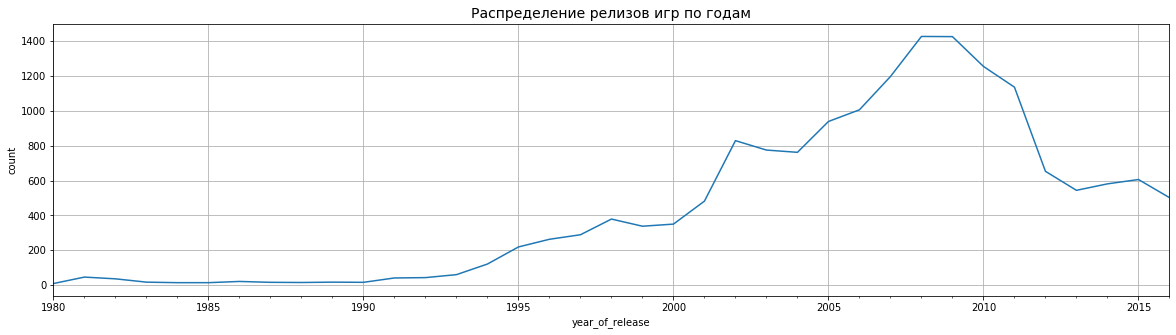

In [16]:
#вывод графика по количеству игр, выпущенных в разные годы
games_year.plot(figsize = (20,5), grid=True)
plt.ylabel('count')
plt.title('Распределение релизов игр по годам', fontsize=14)
plt.show()    

<a id='section8'></a>
### 3.2. Общая динамика продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


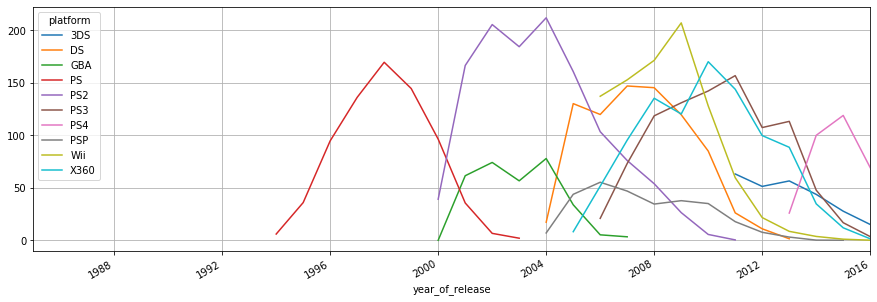

In [17]:
#группировка суммарных продаж по платформам и сортировка по убыванию продаж
report = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
top_10 = report.index
display(report)
# график продаж по top 10 платформ по годам
data.query('platform in @top_10').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,5),grid=True);



<a id='section9'></a>
### 3.3. Срок жизни игровой платформы

Посмотрим на срок актуальности игровой платформы

In [18]:
# выбираем порог продаж 100 тыс.копий
min_sales = 0.1
# находим суммарные продажи в год выше порога
report_1 = data.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).query('total_sales > @min_sales')
# среднее число лет порога
report_1.reset_index().groupby('platform').agg({'year_of_release':'nunique'}).mean()

year_of_release    8.035714
dtype: float64

Рассчет показал, что в среднем срок жизни платформы составляет 8 лет, из графика также видно, что между началом и концом продаж проходти 8-10 лет.

<a id='section10'></a>
### 3.4. Динамика продаж по топовым платформ в актуальном периоде

**Учитывая, что индустрия компьютерных игр очень быстро меняется, чтобы строить прогнозы на будущее, для целей дальнейшего анализа будем рассматривать последние 3 года.**

Возьмем актуальный период 3 последних года - с 2014 по 2016 гг. и посмотрим распределение продаж по топовым платформам за этот период.

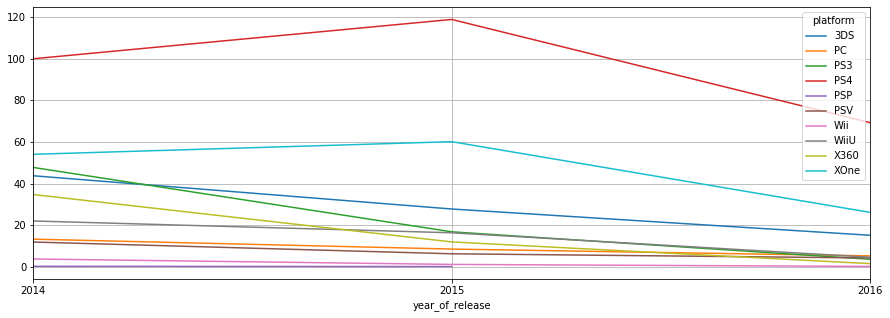

In [19]:
# посмотрим, какие платформы лидируют в актуальном периоде
report_new = data.query('year_of_release >= "2014-01-01"').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
top_new = report_new.index

# берем нужный срез данных и формируем сводную таблицу по годам
platform_actually = (
    data.query('platform in @top_new and year_of_release >= "2014-01-01"')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)
platform_actually.plot(figsize=(15,5),grid=True); # строим график продаж по каждой платформе по годам

**Лидером продаж является консоль PS4, далее идет XOne и на 3-м месте платформа 3DS.** 

**Из графика видно, что платформа PSP уже в 2015 году подошла к концу срока существования, можно заметить, что платформами, которые находятся в конце своего существования являются также PS3, X360, WII. На смену этим платформам пришли новые, это PS4, XOne, WiiU, они с 2014 года только набирают обороты и в 2015 году достигают пика продаж. Стоит выделить PC, т.к. она продается с 1995 года и до сих пор.
Самыми популярными и восстребованными платформами можно считать: PS4, XOne, WiiU, PC и 3DS, которая имеет большое количество продаж в 2015 и 2016 годах.**

In [20]:
# объявим переменную с прибыльными платформами
profitable_platforms = ['WiiU', 'PS4', 'XOne', 'PC', '3DS']

Построим график «ящик с усами» по глобальным продажам игр в разбивке по каждой из потенциально прибыльных платформ за актуальный период.

Text(0, 0.5, 'total_sales')

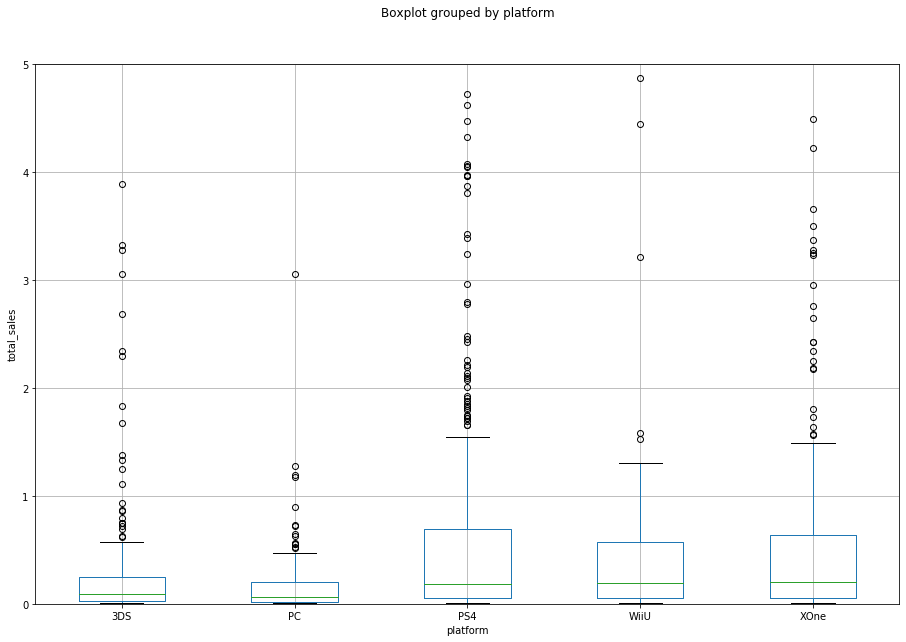

In [21]:
# построим боксплот
data.query('platform in @profitable_platforms and year_of_release >= "2014-01-01"').boxplot('total_sales', by='platform', figsize=(15,10));
plt.ylim(0,5)
plt.title('')
plt.ylabel('total_sales')


**Из боксплотов мы можем увидеть, самые большие медианные значения продаж у PS4, WiiU и XOne, что может означать, что эти платформы являются потенциально более прибыльными. Также стоит отметить, что у платформ PS4, XOne, WiiU наблюдаются значения , которые значительно выбиваются из общего распределения (выбросы на графике), это значит, что эти платформы имеют много игр-бестселлеров, т.е. самые продаваемы игры разошлись тиражом 4-5 млн.копий и более.**


<a id='section11'></a>
### 3.5. Корреляционный анализ зависимости продаж от отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Возьмем список актуальных топовых платформ - 'WiiU', 'PS4', 'XOne', 'PC', '3DS'. 


Корреляция объема продаж и оценок по платформе PS4

Коэффициент корреляции между объемом продаж и оценками пользователей: -0.031957110204556424
Коэффициент корреляции между объемом продаж и оценками критиков: 0.406567902061781

Корреляция объема продаж и оценок по платформе XOne

Коэффициент корреляции между объемом продаж и оценками пользователей: -0.06892505328279412
Коэффициент корреляции между объемом продаж и оценками критиков: 0.41699832800840175

Корреляция объема продаж и оценок по платформе WiiU

Коэффициент корреляции между объемом продаж и оценками пользователей: 0.4002190202148617
Коэффициент корреляции между объемом продаж и оценками критиков: 0.3483797601201749

Корреляция объема продаж и оценок по платформе 3DS

Коэффициент корреляции между объемом продаж и оценками пользователей: 0.22207843643390884
Коэффициент корреляции между объемом продаж и оценками критиков: 0.34873973059848346

Корреляция объема продаж и оценок по платформе PC

Коэффициент корреляции между объемо

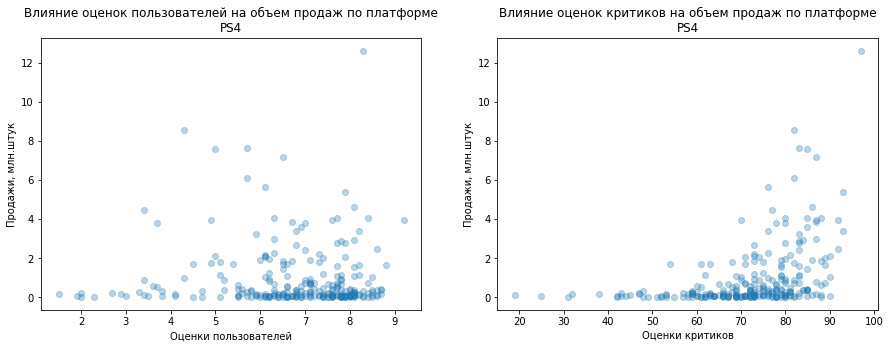

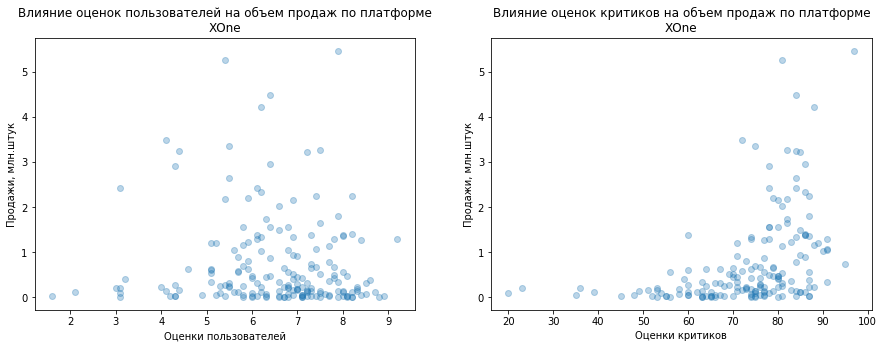

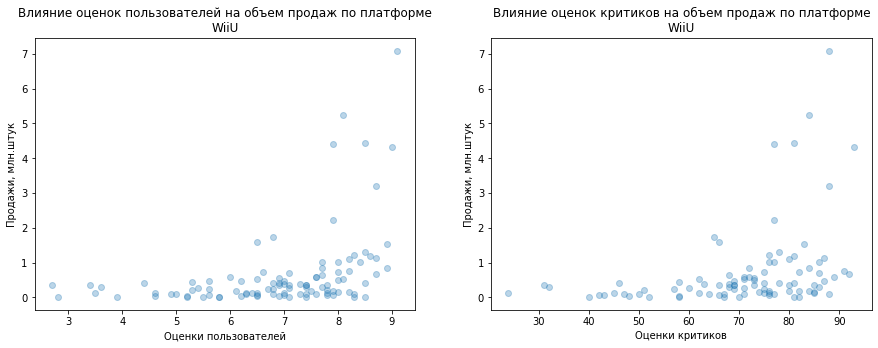

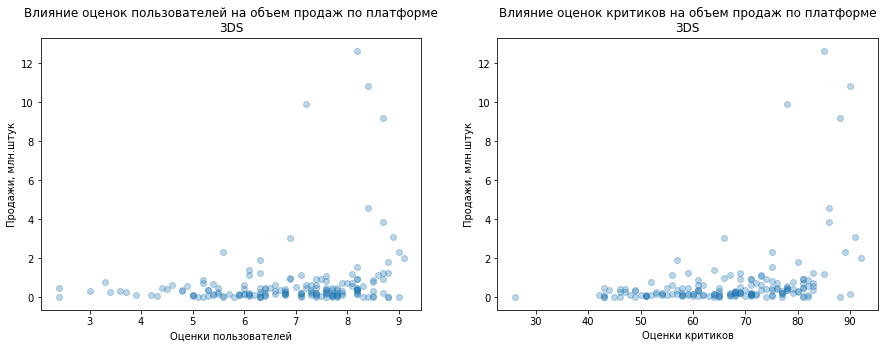

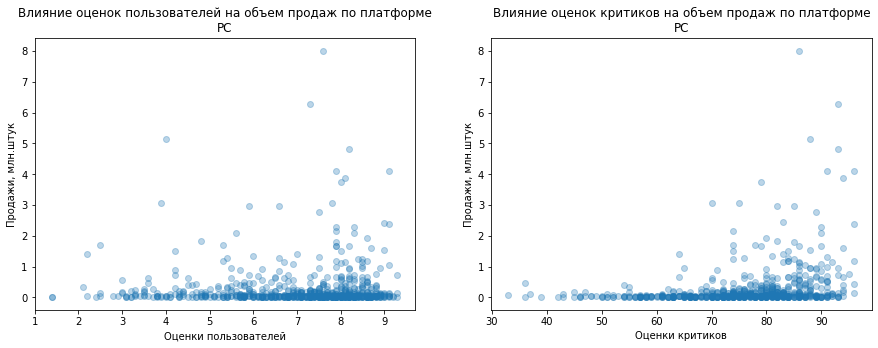

In [22]:
# напишем функцию для вывода диаграмм рассеяния и коэффициентов корреляции
def sales_score_corr(platform_corr):
    print('')
    print('Корреляция объема продаж и оценок по платформе ' + str(platform_corr))
    print('')
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax1.scatter(x=data.query('platform == @platform_corr')['user_score'], y=data.query('platform == @platform_corr')['total_sales'], alpha=0.3)
    ax1.set_title('Влияние оценок пользователей на объем продаж по платформе\n'+ str(platform_corr))
    ax1.set_ylabel('Продажи, млн.штук')
    ax1.set_xlabel('Оценки пользователей')
    ax2.scatter(x=data.query('platform == @platform_corr')['critic_score'], y=data.query('platform == @platform_corr')['total_sales'], alpha=0.3)
    ax2.set_title('Влияние оценок критиков на объем продаж по платформе\n'+ str(platform_corr))
    ax2.set_ylabel('Продажи, млн.штук')
    ax2.set_xlabel('Оценки критиков')
    print('Коэффициент корреляции между объемом продаж и оценками пользователей:', 
      data.query('platform == @platform_corr')['total_sales'].corr(data.query('platform == @platform_corr')['user_score']))
    print('Коэффициент корреляции между объемом продаж и оценками критиков:', 
      data.query('platform == @platform_corr')['total_sales'].corr(data.query('platform == @platform_corr')['critic_score']))

# вызовем функцию для списка актуальных топовых платформ    
sales_score_corr("PS4")   
sales_score_corr("XOne")
sales_score_corr("WiiU")
sales_score_corr("3DS")
sales_score_corr("PC")

**Результаты данных рассчетов говорят нам о том, что:**
- **связи между оценками пользователей и объемом продаж нет, это заметно по результатам анализа почти всех рассмотренных платформ, кроме WiiU, там заметна слабая зависимость;**
- **оценки критиков не сильно, но влияют на продажи, причем наиболее выражена эта связь на платформе XOne, слабее всех - на PC.**

<a id='section12'></a>
### 3.6. Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

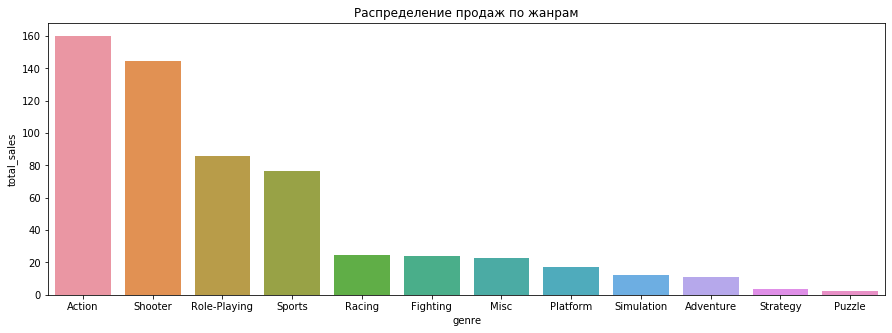

In [23]:
# выводим распределение продаж по жанрам
genre_sales = (
    data.query('platform in @profitable_platforms and year_of_release >= "2014-01-01"') # берем срез по топ 10 платформ, начиная с 2012г.
    .pivot_table(index='genre', values='total_sales', aggfunc='sum') # делаем сводную таблицу по жанру
    .sort_values(by='total_sales', ascending=False) # сортируем по убыванию объема продаж
    .reset_index().rename_axis(None, axis=1) # обновляем индексацию
)
plt.figure(figsize=(15,5)) # строим гистограмму
plt.title('Распределение продаж по жанрам')
sns.barplot(data=genre_sales, x='genre', y='total_sales');


Смотря на общий объем продаж, видно, что больше всего копий игр было продано в жанре Action, Shooter и Role-Playing. 

Однако, следует посмотреть также на распределение средних значений продаж и медиан.


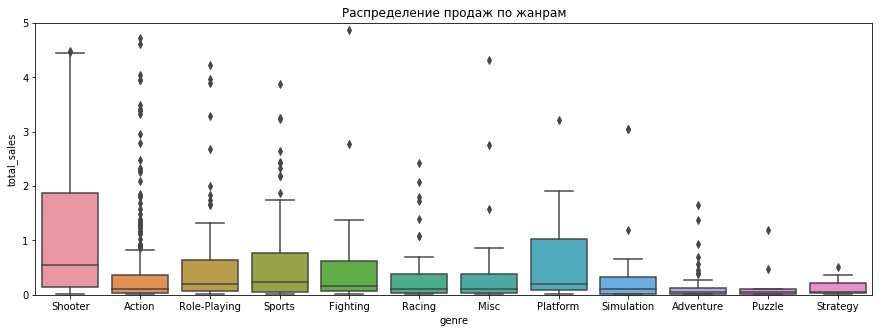

In [24]:
# выводим боксплоты, чтобы посмотреть на распредение средних значений и медиан
plt.figure(figsize=(15,5)) 
plt.title('Распределение продаж по жанрам')
plt.ylim(0,5)
sns.boxplot(data=data.query('platform in @profitable_platforms and year_of_release >= "2014-01-01"'), x='genre', y='total_sales');

Теперь стало видно, что самые продаваемые игры в  жанре Shooter, Sports, Platform, Action. Игры жанра Shooter имеют также самую большую дисперсию, т.е. имеют большое число игр-хитов. Хуже всего в актуальном периоде продаются игры Puzzle, Adventure и Strategy, они имеют самый маленький размах и не имеют игр-бестселлеров.
Поэтому потенциально более прибыльными жанрами можно назвать Shooter, Sports, Platform, Action и Role-Playing - они самые популярные, имеют больше всего продаж и бестселлеров.

## 4. Портрет пользователя каждого региона

<a id='section13'></a>
### 4.1.Топ-5 популярных платформ

Для пользователя каждого региона определим самые популярные платформы:


In [25]:
# напишем функцию, которая будет выводить пайчарт с долей продаж по платформам
def ratio_func(data, col_name):
    result = (
        data.query('year_of_release >= "2014-01-01"')
        .pivot_table(index='platform',values=col_name, aggfunc='sum') # группируем данные
        .sort_values(by=col_name,ascending=False) # сортируем данные
        .head(5) # берем топ-5
    )
    result.plot(kind='pie', figsize=(5, 5),subplots=True,autopct='%1.1f%%', title='Доля продаж'); # выводим пайчарт
    


**TOP-5 Платформ. NA - регион Северная Америка**

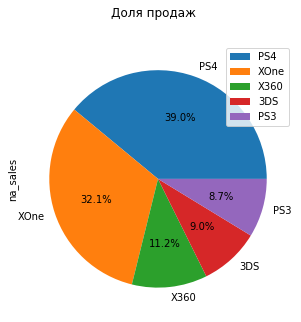

In [26]:
# применим функцию для вывода пайчарта по доле продаж для Северной Америки
ratio_func(data, 'na_sales')

**TOP-5 Платформ. EU - Европейский регион**

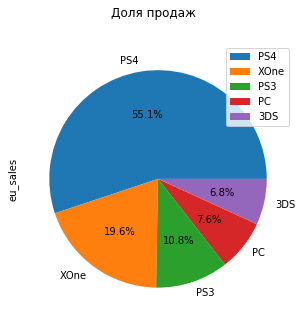

In [27]:
# применим функцию для вывода пайчарта по доле продаж для Европы
ratio_func(data, 'eu_sales')

**TOP-5 Платформ. JP - Япония**

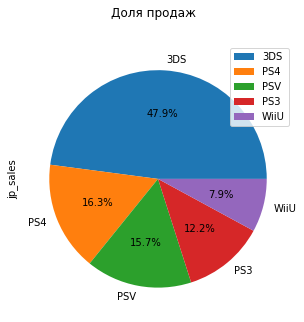

In [28]:
# применим функцию для вывода пайчарта по доле продаж для Японии
ratio_func(data, 'jp_sales')

На рынке Северной Америки наиболее популярна PS4 -ее доля составила 39%, в Европе самамя большая доля(55%) также приходится на PS4, а вот в Японии картина отличается - большим спросом там пользуется платформа 3DS (48%), на PS4 там приходится 16%.

<a id='section14'></a>
### 4.2. Топ-5 популярных жанров

In [29]:
# напишем функцию, которая будет выводить пай чарт с долей продаж по жанрам
def ratio_genre_func(data_2, col_name_genre):
    result_2 = (
        data_2.query('year_of_release >= "2014-01-01"')
        .pivot_table(index='genre',values=col_name_genre, aggfunc='sum') # группируем данные
        .sort_values(by=col_name_genre,ascending=False) # сортируем данные
        .head(5) # берем топ-5
    )
    result_2.plot(kind='pie', figsize=(5, 5),subplots=True,autopct='%1.1f%%', title='Доля продаж'); # выводим пайчарт

**TOP-5 жанров. NA - регион Северная Америка**

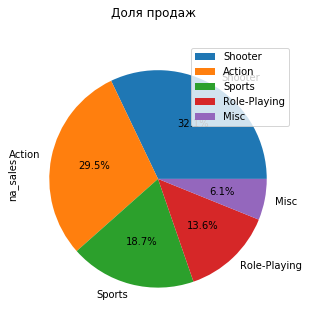

In [30]:
ratio_genre_func(data,'na_sales')

**TOP-5 жанров. EU - Европейский регион**

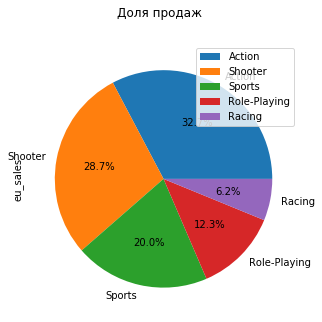

In [31]:
ratio_genre_func(data,'eu_sales')

**TOP-5 жанров. JP - Япония**

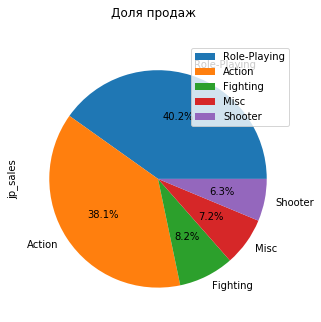

In [32]:
ratio_genre_func(data,'jp_sales')

Северо-Американский и Европейский регионы также очень похожи по популярности жанров. В Северной Америке и Европе популярнее всего Action и Shooter на них приходится примерно по 30%, меньше всего продаж у жанра Misc и Racing. В Японии больше пользуется спросом Role-Playing (40%), а вот на жанр Shooter в Японии приходтся самая маленькая доля - 6%.

<a id='section15'></a>
### 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе

Выясним, какой рейтинг имеют самые продаваемые игры в каждом отдельном регионе.

E - Everyone - для всех, для детей от 6 лет.

T - Teen - игры для подростков старше 13 лет.

M - Mature - игры для подростков, старше 17 лет.

E10+ - Everyone 10 and older - для всех, старше 10 лет.

EC - Early Childhood - для детей от 3 лет.

RP - Rating Pending - рейтинг еще не присвоен, зачастую это игры добавленные сразу после презентации.

AO - Adults Only 18+ - только для взрослых, старше 18 лет.

In [33]:
# напишем функцию, которая будет выводить пай чарт по рейтингу
def ratio_rating_func(data_3, col_name_rating):
    result_3 = (
        data_3.query('year_of_release >= "2014-01-01"')
        .pivot_table(index='rating',values=col_name_rating, aggfunc='sum') # группируем данные
        .sort_values(by=col_name_rating,ascending=False) # сортируем данные
        .head(5) # берем топ-5
    )
    result_3.plot(kind='pie', figsize=(5, 5),subplots=True,autopct='%1.1f%%', title='Доля продаж'); # выводим пайчарт
    

**Рейтинг. NA - регион Северная Америка**

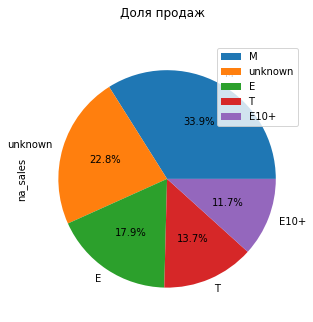

In [34]:
ratio_rating_func(data, 'na_sales')

**Рейтинг. EU - Европейский регион**

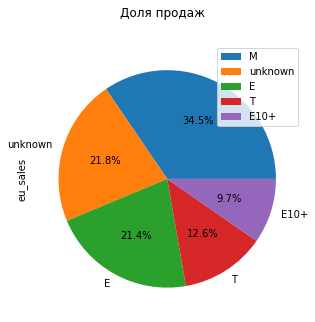

In [35]:
ratio_rating_func(data, 'eu_sales')

**Рейтинг. JP - Япония**

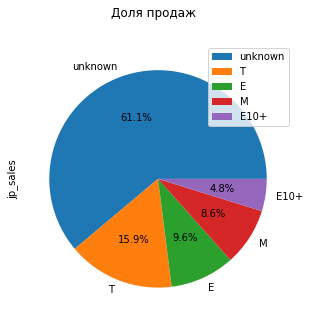

In [36]:
ratio_rating_func(data, 'jp_sales')

В Северной Америке и в Европе наиболее популярны игры с рейтингом M - Mature - игры для подростков, старше 17 лет. В Японии самая большая доля 61% приходится на категорию unknown, которой мы обозначили пропущенные значения, но среди оставшихся значений рейтинга наибольшая доля принадлежит рейтингу T-Teen - игры для подростков старше 13 лет. Меньше всего продаж приходится на игры с рейтингм Е10+ во всех регионах.

**Таким образом, мы определили портреты пользователей для разных регионов и выяснили, что**

- при ориентации на рынок Северной Америки в первую очередь нужно обратить внимание на игры платформ PS4 и XOne, в жанре Action, Sports и Shooter, с рейтингм M (подростки от 17 лет).
- для рынка Европы стоит рассматривать игры платформ РС4 и XOne, также в жанре Action, Sports и Shooter с рейтингом M и E.
- при планировании продаж на рынок Японии стоит внимательнее рассматривать игры платформ 3DS и PS4  в жанре Role-Playing и Action с рейтингом T и Е.

## 5. Статистический анализ данных

<a id='section16'></a>
### 5.1. Проверка первой гипотезы

Нужно проверить 2 гипотезы:
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2) Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы для первого пункта:

*Н0 - средние пользовательские рейтинги платформ Xbox One и PC равны*

*Н1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются*

Проверим гипотезы, используя встроенную в библиотеку scipy функцию ttest_ind - которая вычисляет уровень значимости критерия Стьюдента для двух независимых выборок. 

In [37]:
# создание новых датафреймов с оценками пользователей для Xbox One и PC
data_xbox = data.query('platform == "XOne" and user_score != "nan" and year_of_release >= "2014-01-01"')['user_score']
data_pc = data.query('platform == "PC" and user_score != "nan" and year_of_release >= "2014-01-01"')['user_score']

In [38]:
# критический уровень статистической значимости возьмем равным 5%
alpha = 0.05
# запуск t-теста
results = st.ttest_ind(data_xbox, data_pc, equal_var = True)
print(results.pvalue)
if results.pvalue < alpha:
    print('Нулевую гипотезу отвергаем')
else:
    print('Нулевую гипотезу не отвергаем')

0.10450507919348415
Нулевую гипотезу не отвергаем


**Полученное значение p-value больше выбранного уровня статистической значимости, а значит нулевую гипотезу мы не отвергаем. 
Выведем средние значения оценок пользователей для наших выборок, чтобы убедиться, что средние значения не отличаются.**

In [39]:
# выводим среднее значение оценок пользователей
data_platform_mean = (
    data.query('platform == "XOne" or platform == "PC" and user_score != "nan" and year_of_release >= "2014-01-01"') # делаем срез данных
    .pivot_table(index='platform', values='user_score', aggfunc='mean') # группируем
    .rename(columns={'user_score':'mean_user_score'}) # переименовываем столбец с оценками пользователей
)
data_platform_mean


,mean_user_score
platform,
PC,6.298361
XOne,6.521429


Действительно, средние оценки пользователей по платформам XOne и PC практически равны.

<a id='section17'></a>
### 5.2. Проверка второй гипотезы

Проверим вторую гипотезу тем же способом

*Н0 - средние пользовательские рейтинги платформ жанров Action и Sports равны*

*Н1 - средние пользовательские рейтинги платформ жанров Action и Sports отличаются*

In [40]:
# создадим новые датафреймы для двух выборок - для жанра Action и Sports
data_action = data.query('genre == "Action" and user_score != "nan" and year_of_release >= "2014-01-01"')['user_score']
data_sport = data.query('genre == "Sports" and user_score != "nan" and year_of_release >= "2014-01-01"')['user_score']


In [41]:
# задаем уровень стат.значимости 5%
alpha = 0.05
# запускаем t-test
results = st.ttest_ind(data_action, data_sport, equal_var = True)
print(results.pvalue)
if results.pvalue < alpha:
    print('Нулевую гипотезу отвергаем')
else:
    print('Нулевую гипотезу не отвергаем')

2.8711147985105864e-19
Нулевую гипотезу отвергаем


Полученное значение p-value меньше выбранного уровня статистической значимости, т.е. если бы мы утверждали, что средние равны, то более чем в 95% случаев мы бы ошиблись, а значит нулевую гипотезу мы отвергаем. Выведем средние значения оценок пользователей для наших выборок, чтобы убедиться, что средние значения отличаются.


In [42]:
# выводим среднее значение оценок пользователей
data_genre_mean = (
    data.query('genre == "Action" or genre == "Sports" and user_score != "nan" and year_of_release >= "2014-01-01"') # делаем срез данных
    .pivot_table(index='genre', values='user_score', aggfunc='mean') # группируем
    .rename(columns={'user_score':'mean_user_score'}) # переименовываем столбец с оценками пользователей
)
data_genre_mean

,mean_user_score
genre,
Action,7.058129
Sports,5.225197


Видим, что оценки пользователей для жанров Action и Sports действительно отличаются.

<a id='section18'></a>    
## 6. Общий вывод  

<div style="border:solid green 2px; padding: 20px">
    
Перед проведением исследования данные были подробно изучены и были обнаружены проблемы в виде не подходящих типов данных, пропусков, заглавные буквы в названиях столбцов - все это потребовало обработки, также был добавлен столбец total_sales  с суммарными продажами по всем регионам.

Для целей анализа мы рассматривали данные только за актуальный период - последние 3 года, т.е. с 2014 по 2016 гг., т.к. предыдущие периоды уже не являются полезными для составления прогнозов на 2017 год.
    
Мы взяли топ платформ с самыми большими объемами продаж за период с 2014г. по 2016 г. и выяснили, что лидером продаж является консоль PS4, далее идет XOne и на 3-м месте платформа 3DS. Платформа PSP уже в 2015 году подошла к концу срока существования, можно заметить, что платформами, которые находятся в конце своего существования являются также PS3, X360, WII. На смену этим платформам пришли новые, это PS4, XOne, WiiU, они с 2014 года только набирают обороты и в 2015 году достигают пика продаж. Стоит выделить PC, т.к. она продается с 1995 года и до сих пор. Самыми популярными и восстребованными платформами можно считать: PS4, XOne, WiiU, PC и 3DS, которая имеет большое количество продаж в 2015 и 2016 годах.
    
Самые большие медианные значения продаж у PS4, WiiU и XOne, что может означать, что эти платформы являются потенциально более прибыльными. Также стоит отметить, что у платформ PS4, XOne, WiiU наблюдаются значения , которые значительно выбиваются из общего распределения (выбросы на графике), это значит, что эти платформы имеют много игр-бестселлеров.
    
Также было выяснено что: 
- связи между оценками пользователей и объемом продаж нет, это заметно по результатам анализа почти всех рассмотренных платформ, кроме WiiU, там заметна слабая зависимость;
- оценки критиков не сильно, но влияют на продажи, причем наиболее выражена эта связь на платформе XOne, слабее всех - на PC.
    
В разрезе жанров самые продаваемые игры в жанре Shooter, Sports, Platform, Action. Хуже всего в актуальном периоде продаются игры Puzzle, Adventure и Strategy.Поэтому потенциально более прибыльными жанрами можно назвать Shooter, Sports, Platform, Action - они самые популярные, имеют больше всего продаж и бестселлеров.
    
Проверяя гипотезы о равенстве средних оценок пользователей для платформ XOne и PC и жанров Action и Sports, было выяснено:
- средние оценки пользователей по платформам XOne и PC очень близки по среднему значению и можно говорить об их равенсте;
- оценки пользователей для жанров Action и Sports отличаются.
    
Составляя портерт пользователя для разных регионов, было выяснено, что рынок Японии отличается от других рынков. На успех игры влияет множество факторов, среди которых платформа, жанр, оценки критиков и пользователей, возрастной рейтинг, поэтому при составлении плана продаж на 2017 год и разработке новых игр стоит учесть, что:
- **при ориентации на рынок Северной Америки в первую очередь нужно обратить внимание на игры платформ PS4 и XOne, в жанре Action, Sports и Shooter, с рейтингм M (подростки от 17 лет);**
- **для рынка Европы стоит рассматривать игры платформ РС4 и XOne, также в жанре Action, Sports и Shooter с рейтингом M и E;**
- **при планировании продаж на рынок Японии стоит внимательнее рассматривать игры платформ 3DS и PS4 в жанре Role-Playing и Action с рейтингом T и Е.**
